<img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 450px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;  margin-top:40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Part 1: <strong>Exploratory Data Analysis</strong></center></div>
<div style= "font-size: 40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>for the time series to study in the project</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Análise de Séries Temporais e Previsão 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Grupo 7:</center></div>
   <div><center> Diogo Freitas | 104841 </center></div>
   <div><center> João Francisco Botas | 104782 </center></div>
   <div><center> Miguel Gonçalves | 105944 </center></div>
   <div><center> Ricardo Galvão | 105285 </center></div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Libraries</a></li>
    <li><a href="#2">Fred Data</a></li>
    <li><a href="#3">EDA for each time series</a></li>
        <ol>
            <li><a href="#3.1">Incerteza política do UK</a></li>
            <li><a href="#3.2">Job postings on indeed in the UK</a></li>
        </ol>
    <li><a href="#4">Extra</a></li>
    
    
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Libraries** 

In [54]:
from fredapi import Fred
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.gridspec as gridspec
from collections import OrderedDict
from pandas.plotting import register_matplotlib_converters


from statsmodels.tsa.stattools import adfuller, kpss, bds
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import het_arch
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import skewtest, kurtosistest, skew, kurtosis, boxcox
from pathlib import Path
import os
from darts import TimeSeries
from darts.utils import statistics

import os
os.environ['OMP_NUM_THREADS'] = '1'

In [55]:
%run ../src/functions_EDA.py

# <a class='anchor' id='2'></a>

> # **2. Fred Data** 

In [3]:
fred = Fred(api_key="8ede227d95e33c5cdf2ea8a83577bc0a")
fred_series_ids = ["IHLIDXNSAGB", "IRLTLT01GBM156N", "QGBN628BIS", "UKNGDP", "GBRCPIALLMINMEI"]

fred_series_metadata = []
fred_series_list = []
for series in fred_series_ids:
    metadata = fred.get_series_info(series)
    series = fred.get_series(series).rename(metadata["title"])
    fred_series_metadata.append(metadata)
    fred_series_list.append(series)

fred_series_metadata

[id                                                                 IHLIDXNSAGB
 realtime_start                                                      2025-03-26
 realtime_end                                                        2025-03-26
 title                             Job Postings on Indeed in the United Kingdom
 observation_start                                                   2020-02-01
 observation_end                                                     2025-03-21
 frequency                                                         Daily, 7-Day
 frequency_short                                                              D
 units                                                    Index Feb, 1 2020=100
 units_short                                              Index Feb, 1 2020=100
 seasonal_adjustment                                    Not Seasonally Adjusted
 seasonal_adjustment_short                                                  NSA
 last_updated                           

# <a class='anchor' id='3'></a>

> # **3. EDA for each time series** 

Para esta fase iremos fazer uma análise exploratória de dados para as séries temporais que pretendemos utilizar no nosso projeto, a fim de perceber possíveis características e a fazer um elo de ligação com as fases seguintes:

+ Incerteza política do United Kingdom
+ Job postings on indeed in the UK
+ Interest Rates: Long-Term Government Bond Yields: 10 years
+

# <a class='anchor' id='3.1'></a>

> # **3.1. Incerteza política do UK** 

In [5]:
economic_uncertainty = pd.read_csv("../data/UKEPUINDXM.csv", parse_dates=["observation_date"], index_col="observation_date").squeeze()

```python
data = {
    "daily": [("indeed_jobs", indeed_jobs), ("economic_uncertainty", economic_uncertainty)],
    "monthly": [("interest_rates", interest_rates), ("cpi_uk", cpi_uk)],
    "quarterly": [("residential_prices", residential_prices), ("gdp_uk", gdp_uk)]
}

for periodicity, series in data.items():
    for serie_name, serie in series:
        print(f"{periodicity}, {serie_name}\n{serie.tail()}\n {len(serie)} observations\n")

data_ts = {series_name: TimeSeries.from_series(series) for periodicity, series_list in data.items() for series_name, series in series_list}

In [7]:
data = fred_series_list.copy()
data.append(economic_uncertainty)
data_ts = [TimeSeries.from_series(series) for series in data]
data_ts[5]

<TimeSeries (DataArray) (observation_date: 338, component: 1, sample: 1)> Size: 3kB
array([[[  59.4117 ]],

       [[  57.9327 ]],

       [[  95.83731]],

       [[  95.51237]],

       [[  55.2234 ]],

       [[  63.46032]],

       [[  54.95415]],

       [[  32.10918]],

       [[  74.38128]],

       [[  89.02506]],

...

       [[ 265.26236]],

       [[ 218.6309 ]],

       [[ 113.29084]],

       [[ 181.54405]],

       [[ 303.67783]],

       [[ 388.31066]],

       [[ 396.50595]],

       [[ 409.25162]],

       [[ 456.51048]],

       [[ 304.85076]]])
Coordinates:
  * observation_date  (observation_date) datetime64[ns] 3kB 1997-01-01 ... 20...
  * component         (component) <U10 40B 'UKEPUINDXM'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

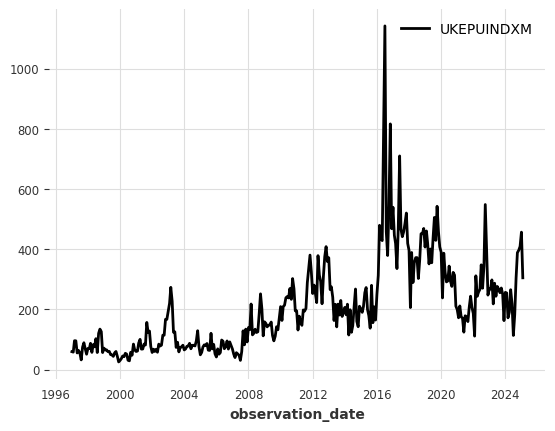

In [12]:
economic_uncertainty_UK = data_ts[5]
economic_uncertainty_UK.plot()
plt.show()

In [15]:
df = data_ts[5].to_dataframe()
print(df.describe(percentiles=[.1, .25, .5, .75, .9]))
print("var    %.6f" % np.var(df))

component   UKEPUINDXM
count       338.000000
mean        203.322570
std         149.009976
min          25.340950
10%          57.117970
25%          80.595552
50%         171.929310
75%         275.751073
90%         407.683907
max        1141.795540
var    22138.280601


c:\Users\35196\Desktop\GHProjetos\ASTP\venv\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\35196\AppData\Local\Temp\ipykernel_15288\3121424607.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("var    %.6f" % np.var(df))


C:\Users\35196\AppData\Local\Temp\ipykernel_15288\1880584310.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,


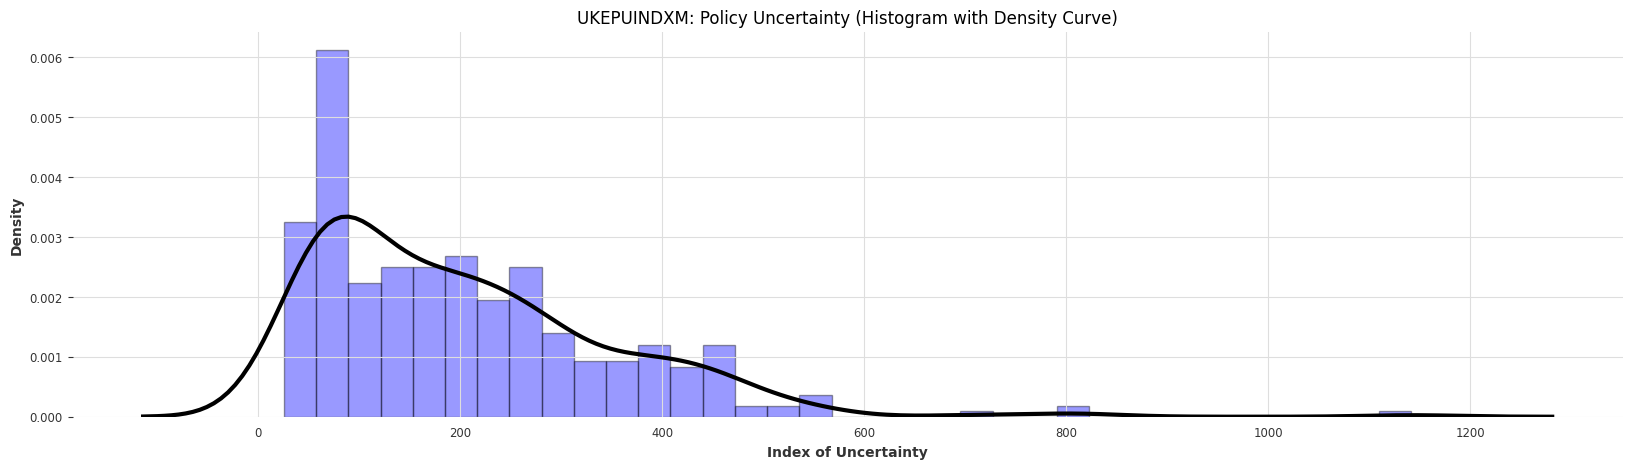

In [20]:
plt.figure(figsize=(20,5))
sns.distplot(df,
             bins = 35, color='blue',
             hist = True, hist_kws={'edgecolor':'black'},
             kde = True, kde_kws={"color": "black", "lw": 3, "label": "KDE"},
             # rug = True, rug_kws={'edgecolor':'orange'}
            )
plt.title('UKEPUINDXM: Policy Uncertainty (Histogram with Density Curve)')
plt.ylabel('Density')
plt.xlabel('Index of Uncertainty')
plt.grid(True)

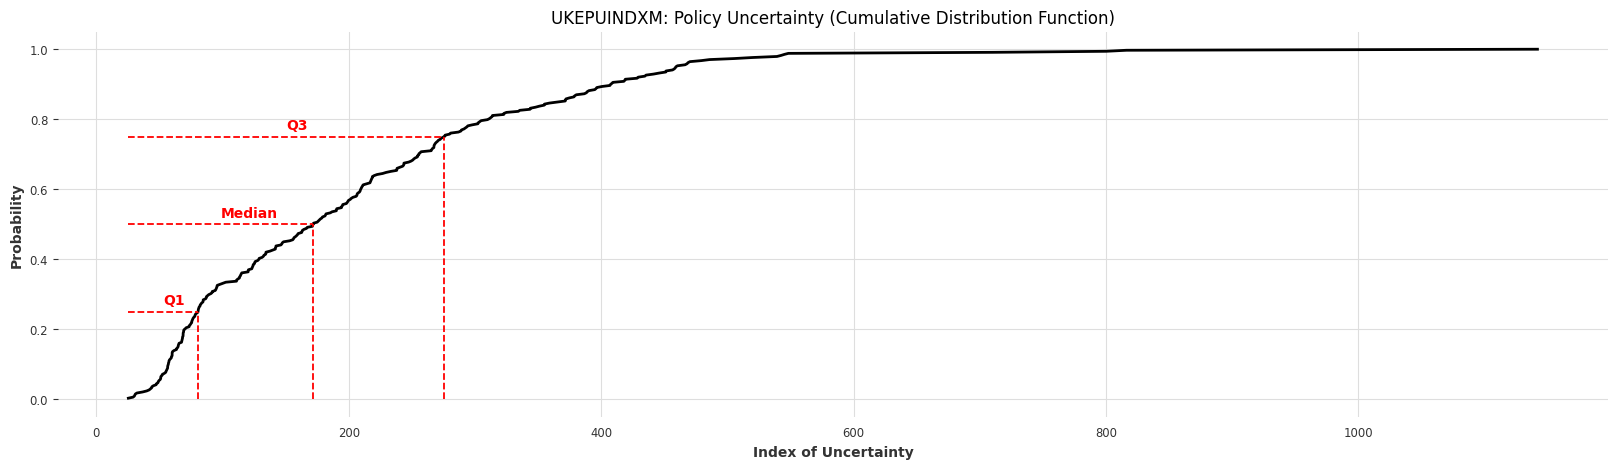

In [21]:
cdf = df[df.columns.values[0]].value_counts().sort_index().div(len(df)).cumsum()
cdf.plot(figsize=(20,5), linewidth=2)
plt.title('UKEPUINDXM: Policy Uncertainty (Cumulative Distribution Function)')
plt.ylabel('Probability')
plt.xlabel('Index of Uncertainty')
minVal = df.values.min()
q25 = np.quantile(df.values, .25)
medianVal = np.quantile(df.values, .5)
q75 = np.quantile(df.values, .75)
data=[(minVal, q25), (.25, .25), 'r', (q25, q25), (0, .25), 'r', \
      (minVal, medianVal), (.5, .5), 'r', (medianVal, medianVal), (0, .5), 'r', \
      (minVal, q75), (.75, .75), 'r', (q75, q75), (0, .75), 'r']
plt.plot(*data, ls='--');
plt.text(minVal+(q25-minVal)/2, 0.27, "Q1", color='r', fontweight='bold')
plt.text(minVal+(medianVal-minVal)/2, 0.52, "Median", color='r', fontweight='bold')
plt.text(minVal+(q75-minVal)/2, 0.77, "Q3", color='r',  fontweight='bold')
plt.grid(True)

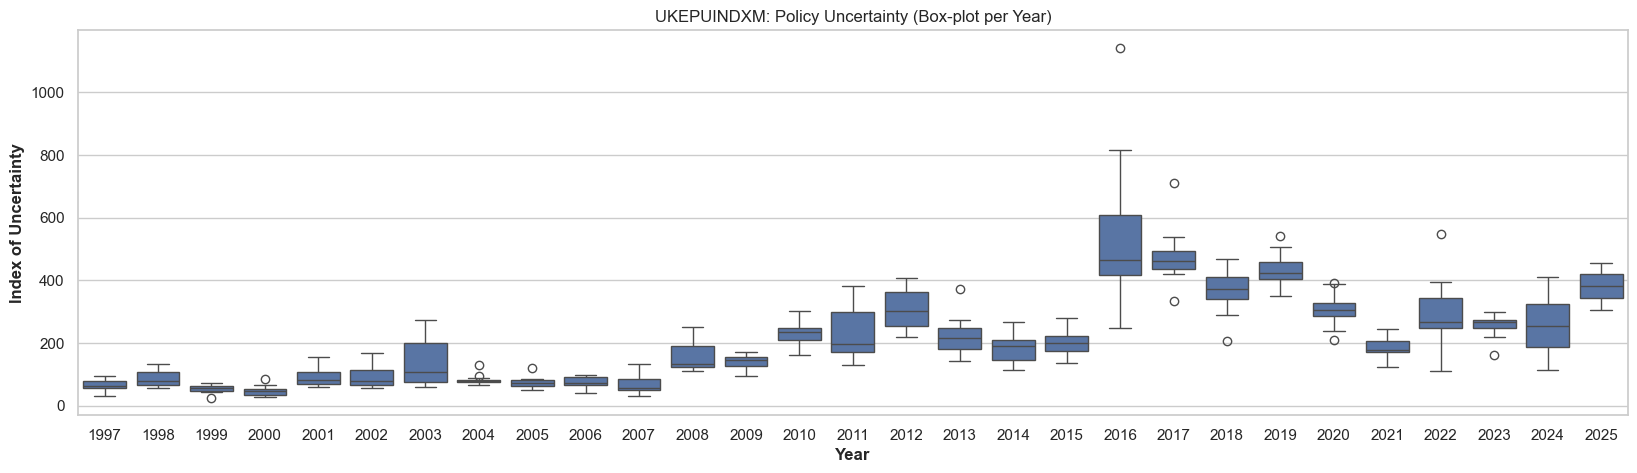

In [22]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set(style="whitegrid")
box_plot = sns.boxplot(x=df.index.year, y=df.columns.values[0], data=df);
box_plot.set(xlabel='Year', ylabel='Index of Uncertainty', title='UKEPUINDXM: Policy Uncertainty (Box-plot per Year)');

Podemos perceber que o ano com maior variação é o de 2016, seguido de anos com índices de incerteza maiores. Esta grande variação em 2016 deve-se ao facto de, a 23 de junho de 2016, ter sido convocada a discussão da permanência ou não do país à União Europeia. Com isto, a incerteza das pessoas aumentou bastante e que pôde desencadear em flutuações maiores nos anos seguintes. 

Pegando nisto que foi dito, conseguimos notar também o ano de 2020 e 2021. O ano de 2020 foi o ano do Brexit (em janeiro), mas também do COVID, o que pode explicar uma incerteza mais baixa porque o COVID pode ter amenizado a incerteza das pessoas em relação à decisão do Brexit.

Vamos estudar a variação disto ao longo dos meses de 2016 e de 2020 para comprovar esta tese.

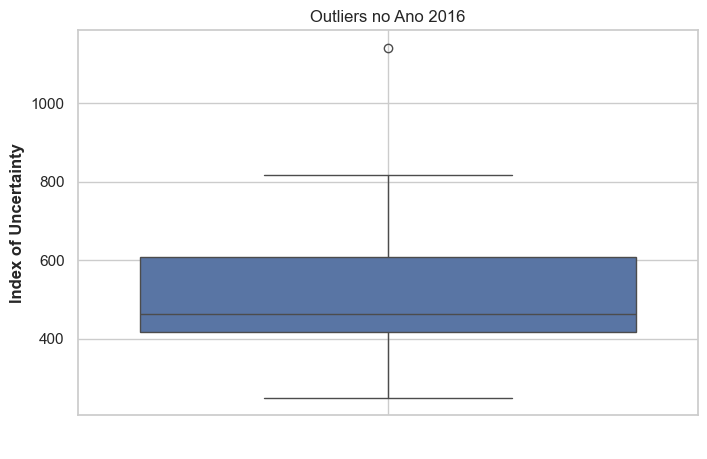

Outliers no ano 2016:
 component         UKEPUINDXM
observation_date            
2016-07-01        1141.79554


In [26]:
def outliers_ano(ano_especifico):
    df_ano = df[df.index.year == ano_especifico]
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df_ano[df_ano.columns[0]])
    plt.title(f'Outliers no Ano {ano_especifico}')
    plt.xlabel(' ')
    plt.ylabel('Index of Uncertainty')
    plt.grid(True)
    plt.show()

    Q1 = df_ano[df_ano.columns[0]].quantile(0.25)
    Q3 = df_ano[df_ano.columns[0]].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df_ano[(df_ano[df_ano.columns[0]] < limite_inferior) | 
                    (df_ano[df_ano.columns[0]] > limite_superior)]

    print(f"Outliers no ano {ano_especifico}:\n", outliers)
outliers_ano(2016)

C:\Users\35196\AppData\Local\Temp\ipykernel_15288\1591876020.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box_plot.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);


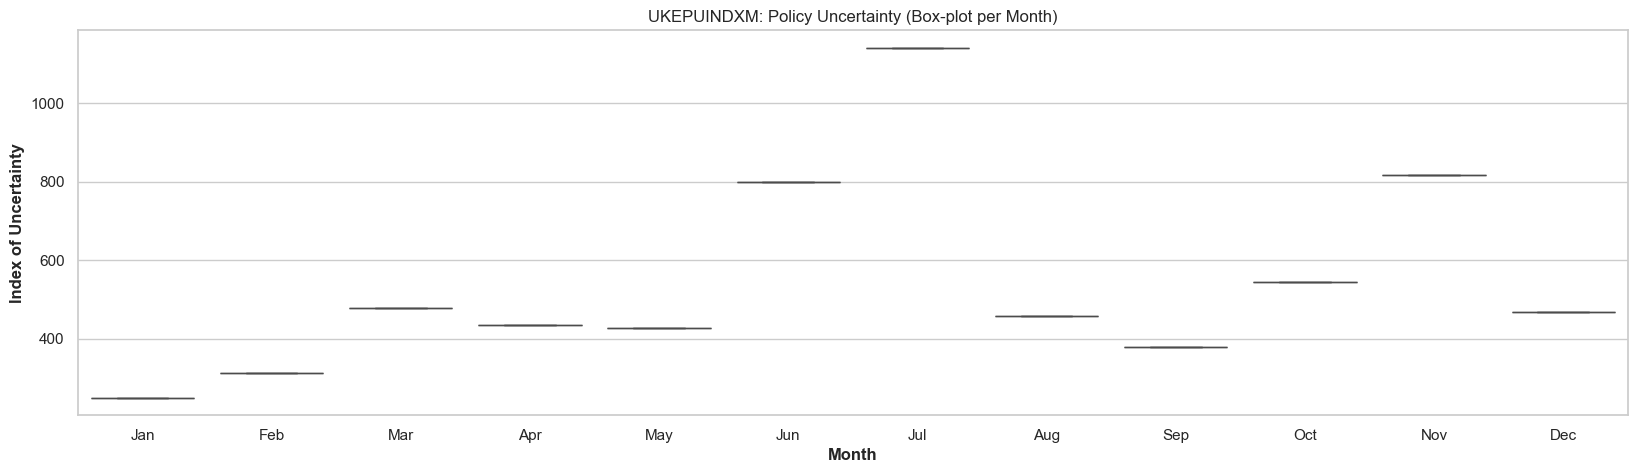

In [30]:
# TODO: NÃO ESTÁ A FUNCIONAR PORQUE A SÉRIE É MENSAL!!!

def months_boxplot_ano(ano_especifico):
    df_ano = df[df.index.year == ano_especifico]
    sns.set(rc={'figure.figsize':(20,5)})
    sns.set(style="whitegrid")
    box_plot = sns.boxplot(x=df_ano.index.month, y=df_ano.columns.values[0], data=df_ano);
    box_plot.set(xlabel='Month', ylabel='Index of Uncertainty', title='UKEPUINDXM: Policy Uncertainty (Box-plot per Month)');
    #box_plot.set_xticklabels(['Jan', 'Apr', 'Jul', 'Oct']);
    box_plot.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);
months_boxplot_ano(2016)

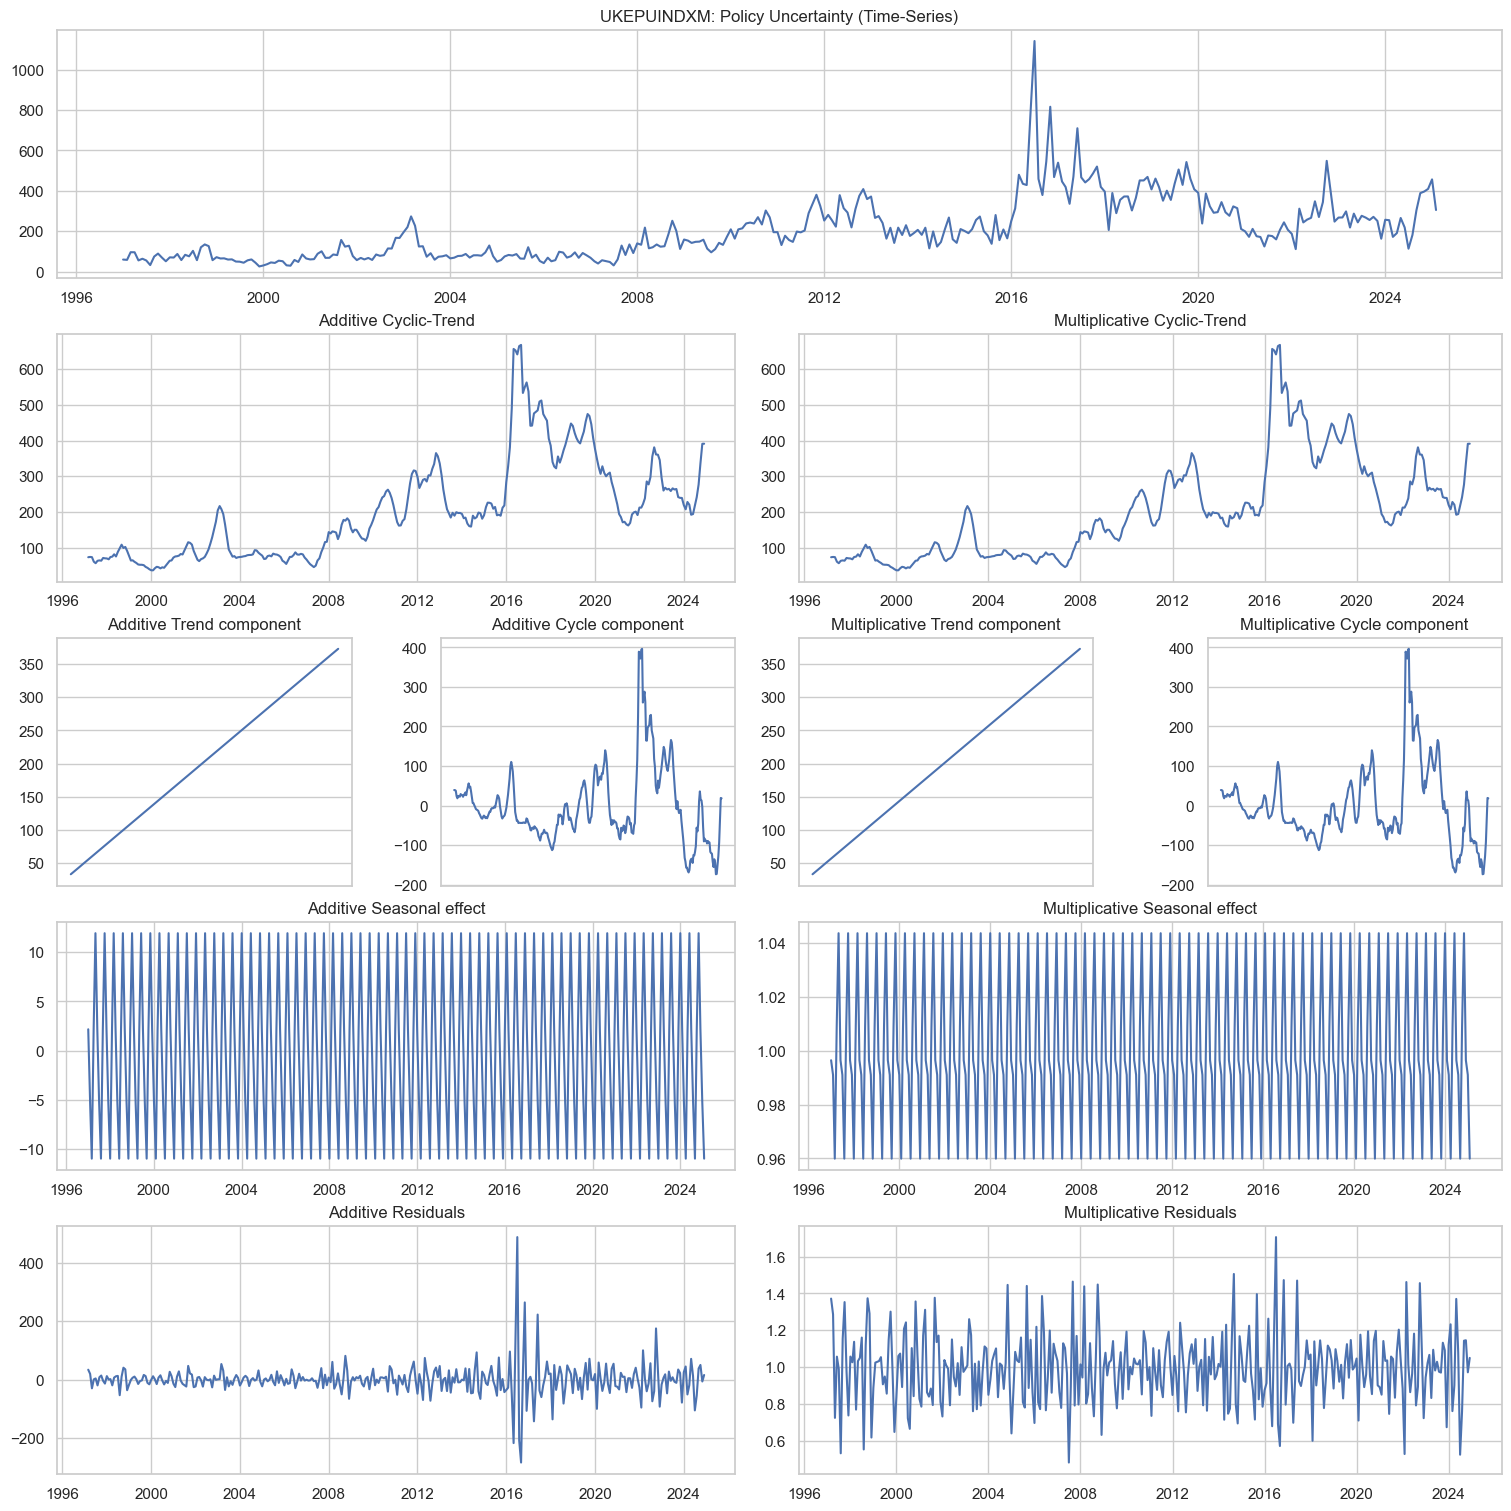

Time-Series Level is component
UKEPUINDXM    203.32
dtype: float64

Additive Time Series
Strenght of Trend: 0.8464
Strenght of Seasonality: 0.0000

Multiplicative Time Series
Strenght of Trend: 1.0000
Strenght of Seasonality: 0.0000


In [47]:
show_decompose(df, seasonal_periods = 5, title="UKEPUINDXM: Policy Uncertainty")

C:\Users\35196\AppData\Local\Temp\ipykernel_15288\3416486574.py:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gp[i] = gp[i-1] + s - drift  # cumulative sum for + change
C:\Users\35196\AppData\Local\Temp\ipykernel_15288\3416486574.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gn[i] = gn[i-1] - s - drift  # cumulative sum for - change
C:\Users\35196\AppData\Local\Temp\ipykernel_15288\3416486574.py:147: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  '(thresh

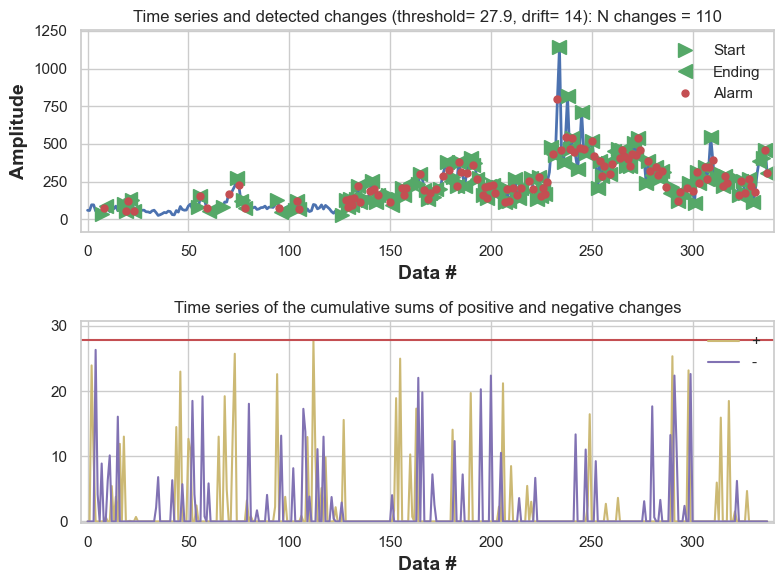

In [ ]:
# Suggestions (attention to seasonal series)
threshold = (max(df.values)-min(df.values))/40
drift = (max(df.values)-min(df.values))/80

#Manual values
#threshold=125 #increases the amplitude, raising the alarm zone barrier
#drift = 1;

detect_cusum(df.values, threshold, drift, True, True);

In [56]:
h0_time_series(df, serie = "UKEPUINDXM: Policy Uncertainty")

Estudar normalidade
Kurtosis Test for UKEPUINDXM: Policy Uncertainty
Statistic: 6.7554
p-value: 0.0000
Kurtosis value: 5.0987
Conclusion: Reject H0: Data is not normal
------------------------------------------------------
Skew Test for UKEPUINDXM: Policy Uncertainty
Statistic: 9.1429
p-value: 0.0000
Skewness value: 1.6325
Conclusion: Reject H0: Data is skewed
------------------------------------------------------
Jarque-Bera Test for UKEPUINDXM: Policy Uncertainty
Statistic: 516.2509
p-value: 0.0000
Conclusion: Reject H0: Data is not normal
------------------------------------------------------


TypeError: unsupported format string passed to numpy.ndarray.__format__

# <a class='anchor' id='3.2'></a>

> # **3.2. Job postings on indeed in the UK** 

# <a class='anchor' id='4'></a>

> # **4. Extra** 

In [34]:
data_ts[0].start_time()

Timestamp('2020-02-01 00:00:00')

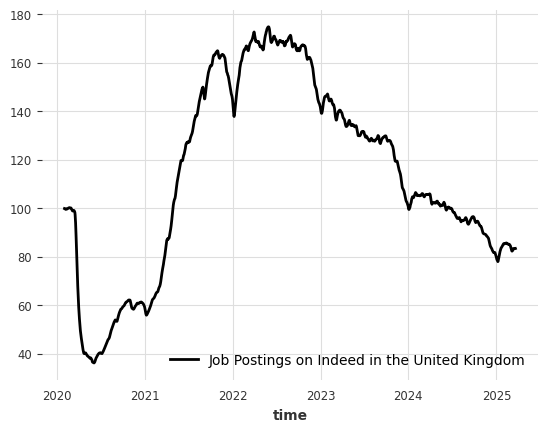

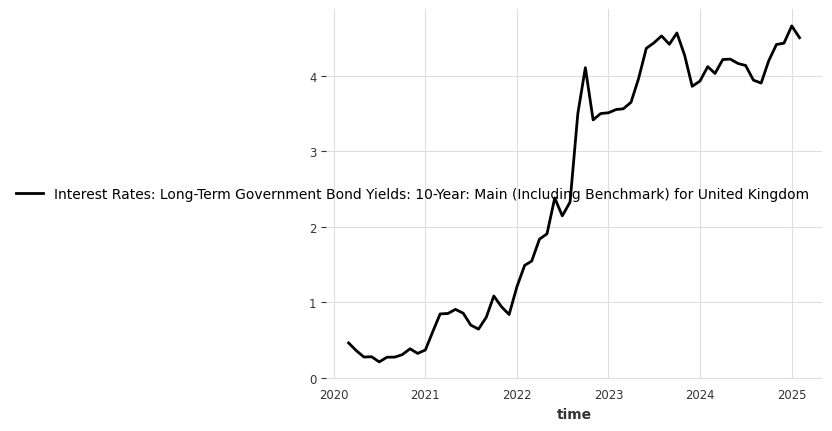

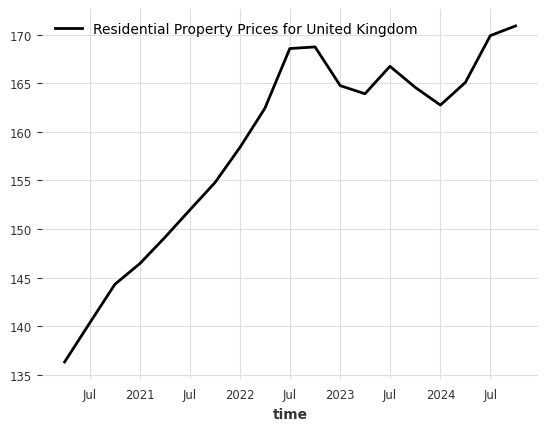

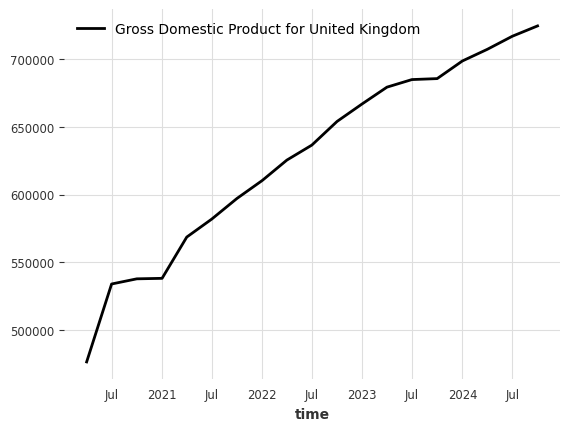

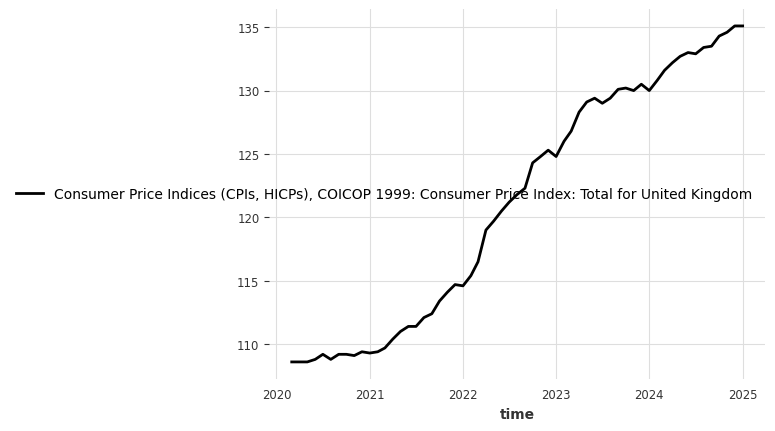

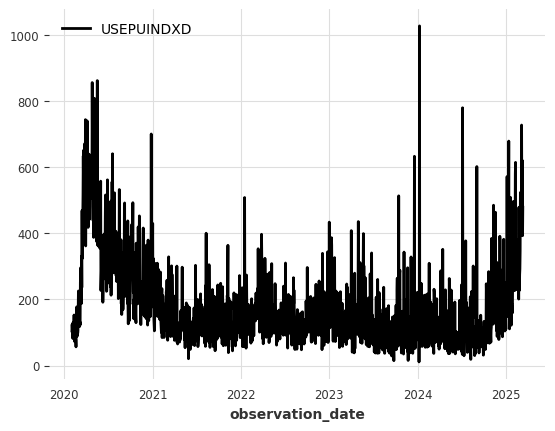

In [35]:
for ts in data_ts:
    ts.drop_before(data_ts[0].start_time()).plot()
    plt.show()

# First experiment: Job Listings on Indeed UK

In [13]:
series = data_ts[0]

In [14]:
# Feature extraction
df = pd.DataFrame(data[0])

In [15]:
df['year'] = df.index.year
df['month'] = df.index.month
df.reset_index(inplace=True)
df['week'] = df['time'].dt.isocalendar().week
df['day'] = df['time'].dt.dayofweek
df['day_str'] = df['time'].dt.strftime('%a')
df['year_month'] = df['time'].dt.strftime('%Y_%m')
df.set_index('time', inplace=True)

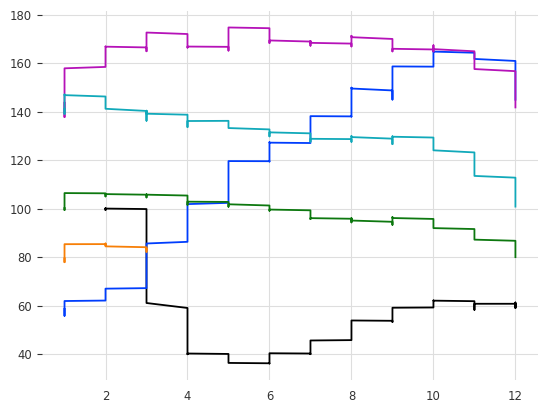

In [16]:
for year in df["year"].unique():
    plt.plot("month", "Job Postings on Indeed in the United Kingdom", data=df[df["year"] == year])
plt.show()

In [17]:
data[0].describe()

count    1876.000000
mean      113.512521
std        39.612707
min        36.200000
25%        85.427500
50%       108.800000
75%       146.292500
max       174.820000
Name: Job Postings on Indeed in the United Kingdom, dtype: float64

In [18]:
train, val = data_ts[0][:-90], data_ts[0][-90:]

In [19]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

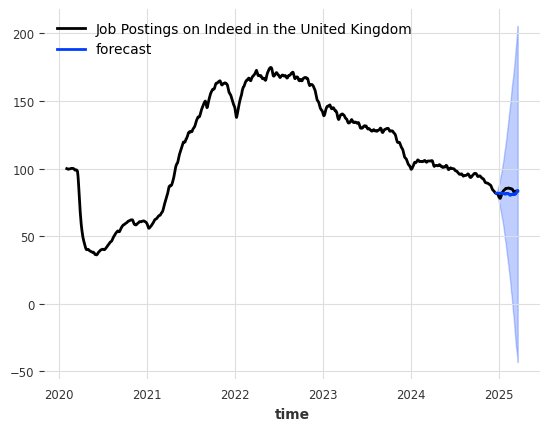

In [20]:
data_ts[0].plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [21]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [22]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

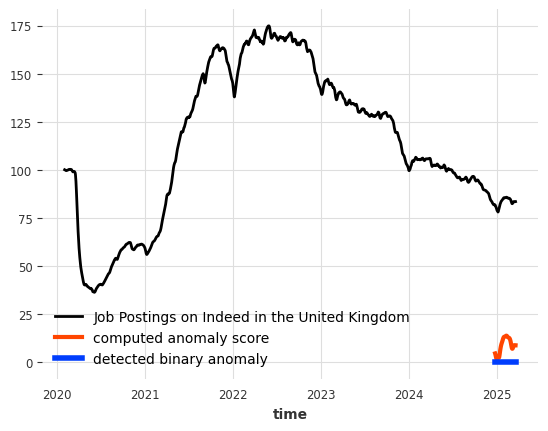

In [23]:
data_ts[0].plot()
(anom_score).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom).plot(label="detected binary anomaly", lw=4)
plt.show()